In [1]:
import pandas as pd

In [74]:
df = pd.read_csv("Civil_List_2014.csv", 
                 names=["DPT","NAME","ADDRESS","TTL", "PC","SAL-RATE"], 
                 skiprows=1,
                 dtype=col_types)
df.head(5)

,DPT,NAME,ADDRESS,TTL,PC,SAL-RATE
0,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
1,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
2,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00
3,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00
4,56,I D AADIL,POLICE DEPARTMENT,71012,A,$46953.00


In [61]:
df.head(10)

,DPT,NAME,ADDRESS,TTL,PC,SAL-RATE
0,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE
1,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
2,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
3,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00
4,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00
5,56,I D AADIL,POLICE DEPARTMENT,71012,A,$46953.00
6,69,M AAKIRI,HRA/DEPARTMENT OF SOCIAL S,56056,A,$33000.00
7,464,A AALAI,CUNY QUEENSBOROUGH COMMUNI,4607,N,$73.53
8,998,A V AALEVIK,N.Y.C. TRANSIT AUTHORITY,402,2,$33280.00
9,998,M AAMIR,N.Y.C. TRANSIT AUTHORITY,00T07,4,$60878.00


In [5]:
df['SAL-RATE'].describe()

count        269838
unique        27533
top       $76488.00
freq          26024
Name: SAL-RATE, dtype: object

In [6]:
df['PC'].value_counts()

KeyError: 'PC'

In [7]:
df.columns

Index(['DPT     ', 'NAME    ', 'ADDRESS ', 'TTL #   ', 'PC      ', 'SAL-RATE'], dtype='object')

In [9]:
"DPT     ".strip()

'DPT'

In [10]:
for col in df.columns:
    print(col.strip())

DPT
NAME
ADDRESS
TTL #
PC
SAL-RATE


In [12]:
# it's a list, so - []
# it's a loop, so - [for col in df.columns]
# col.strip(), so - [col.strip() for col in columns]

[col.strip() for col in df.columns]

['DPT', 'NAME', 'ADDRESS', 'TTL #', 'PC', 'SAL-RATE']

In [13]:
df.columns = [col.strip() for col in df.columns]

In [14]:
df.columns

Index(['DPT', 'NAME', 'ADDRESS', 'TTL #', 'PC', 'SAL-RATE'], dtype='object')

In [15]:
df['PC'].value_counts()

A     100521
D      54881
X      24403
4      23259
3      19866
1      13083
K       7635
F       6361
N       4671
U       3409
B       2817
BW      1766
E       1300
W       1257
G       1085
I        730
2        721
M        708
O        536
WK       488
P        307
L         25
S          4
0          3
V          2
Name: PC, dtype: int64

In [16]:
df['SAL-RATE'].describe()

count        269838
unique        27533
top       $76488.00
freq          26024
Name: SAL-RATE, dtype: object

In [29]:
def money_to_float(money_str):
    return float(money_str.replace("$","").replace(",",""))

print(money_to_int("$76488.00"))
print(money_to_int("$5.00"))
print(money_to_int("$1,500.00"))

76488.0
5.0
1500.0


In [31]:
#money_to_float(df['SAL-RATE'])
df['SAL-RATE'].apply(money_to_float)

0              5.00
1              5.00
2          51955.00
3             12.00
4          46953.00
5          33000.00
6             73.53
7          33280.00
8          60878.00
9          69272.00
10         89960.00
11         38324.00
12         39019.00
13           369.92
14         66127.00
15         64250.00
16         32510.00
17             2.65
18        109087.00
19        111606.00
20             5.00
21         56555.00
22         51643.00
23         77015.00
24         76488.00
25         67627.00
26         68095.00
27         66127.00
28         76689.00
29         48153.00
            ...    
269808     85287.00
269809     65564.00
269810     56937.00
269811     81439.00
269812    118506.00
269813     42064.00
269814        33.18
269815    116364.00
269816     98072.00
269817    107563.00
269818     37150.00
269819     74646.00
269820     64040.00
269821     76488.00
269822     83802.00
269823        17.16
269824     85667.00
269825        46.89
269826        67.42


In [35]:
df['salary'] = df['SAL-RATE'].apply(money_to_float)

In [36]:
df.head()

,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE,salary
0,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,5.0
1,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,5.0
2,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00,51955.0
3,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00,12.0
4,56,I D AADIL,POLICE DEPARTMENT,71012,A,$46953.00,46953.0


In [37]:
df['salary'].describe()

count    269838.000000
mean      54143.707486
std       32345.656289
min           0.500000
25%       36899.000000
50%       57855.000000
75%       76488.000000
max      300000.000000
Name: salary, dtype: float64

In [38]:
%matplotlib inline

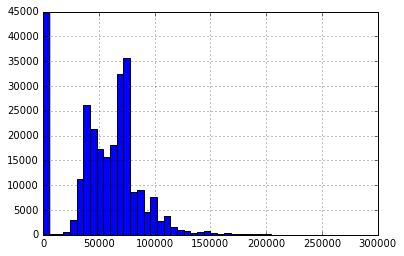

In [46]:
df['salary'].hist(bins=50)

In [47]:
df['ADDRESS'].value_counts()

N.Y.C. TRANSIT AUTHORITY      56932
POLICE DEPARTMENT             51453
FIRE DEPARTMENT               15848
DEPARTMENT OF CITYWIDE ADM    15739
HRA/DEPARTMENT OF SOCIAL S    13676
DEPARTMENT OF EDUCATION       11689
N.Y.C. HOUSING AUTHORITY      11501
DEPARTMENT OF CORRECTION      10188
DEPARTMENT OF SANITATION       9666
DEPARTMENT OF PARKS & RECR     7261
ADMINISTRATION FOR CHILDRE     6033
DEPARTMENT OF ENVIRONMENTA     5717
DEPARTMENT OF HEALTH AND M     5676
DEPARTMENT OF TRANSPORTATI     4589
CUNY LAGUARDIA COMMUNITY C     3379
CUNY KINGSBOROUGH COMMMUNI     3260
CUNY MANHATTAN COMMUNITY C     2974
TRIBOROUGH BRIDGE AND TUNN     2254
HOUSING PRESERVATION & DEV     2078
CUNY QUEENSBOROUGH COMMUNI     2030
DEPARTMENT OF HOMELESS SER     1966
DEPARTMENT OF FINANCE          1953
CUNY BRONX COMMUNITY COLLE     1923
LAW DEPARTMENT                 1514
DISTRICT ATTORNEY-NEW YORK     1384
CUNY HOSTOS COMMUNITY COLL     1295
DEPARTMENT OF DESIGN AND C     1193
DEPARTMENT OF INFORMATION   

In [48]:
df.head()

,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE,salary
0,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,5.0
1,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,5.0
2,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00,51955.0
3,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00,12.0
4,56,I D AADIL,POLICE DEPARTMENT,71012,A,$46953.00,46953.0


In [50]:
agencies_df = pd.read_csv("cleaned-agencies.csv", dtype='str')
agencies_df.head()

,code,agency,is_mayoral
0,002,OFFICE OF THE MAYOR,N
1,003,BOARD OF ELECTIONS,Y
2,004,CAMPAIGN FINANCE BOARD,Y
3,005,BOARD OF ESTIMATE-SECRETARY,Y
4,006,MAYOR'S OFFICE OF OPERATIONS,N


In [53]:
col_types = { 'code': 'str' }
agencies_df = pd.read_csv("cleaned-agencies.csv", dtype=col_types)
agencies_df.head()

,code,agency,is_mayoral
0,002,OFFICE OF THE MAYOR,N
1,003,BOARD OF ELECTIONS,Y
2,004,CAMPAIGN FINANCE BOARD,Y
3,005,BOARD OF ESTIMATE-SECRETARY,Y
4,006,MAYOR'S OFFICE OF OPERATIONS,N


In [55]:
col_types = { 'code': 'str' }
agencies_df = pd.read_csv("cleaned-agencies.csv", dtype=col_types, true_values='Y', false_values='N')
agencies_df.head()

,code,agency,is_mayoral
0,-999,THIS IS FAKE,False
1,-999,THIS IS ALSO FAKE,True
2,-999,THESE ARE ALL FAKE,False
3,002,OFFICE OF THE MAYOR,False
4,003,BOARD OF ELECTIONS,True


In [57]:
col_types = { 'code': 'str' }
agencies_df = pd.read_csv("cleaned-agencies.csv", na_values=["-999"], dtype=col_types, true_values='Y', false_values='N')
agencies_df.head()

,code,agency,is_mayoral
0,NaN,THIS IS FAKE,False
1,NaN,THIS IS ALSO FAKE,True
2,NaN,THESE ARE ALL FAKE,False
3,002,OFFICE OF THE MAYOR,False
4,003,BOARD OF ELECTIONS,True


In [71]:
agencies_df = pd.read_csv("cleaned-agencies.csv")
agencies_df.head()

,code,agency,is_mayoral
0,-999,THIS IS FAKE,N
1,-999,THIS IS ALSO FAKE,Y
2,-999,THESE ARE ALL FAKE,N
3,2,OFFICE OF THE MAYOR,N
4,3,BOARD OF ELECTIONS,Y


In [76]:
df.head()

,DPT,NAME,ADDRESS,TTL,PC,SAL-RATE
0,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
1,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
2,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00
3,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00
4,56,I D AADIL,POLICE DEPARTMENT,71012,A,$46953.00


In [77]:
df.merge(agencies_df, left_on='DPT', right_on='code')

,DPT,NAME,ADDRESS,TTL,PC,SAL-RATE,code,agency,is_mayoral
